In [1]:
# 此代码用来测试task2的dataloader
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as trans
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


['0054.png', '0023.png', '0006.png', '0014.png', '0068.png', '0043.png', '0027.png', '0085.png', '0039.png', '0092.png', '0019.png', '0086.png', '0074.png', '0010.png', '0073.png', '0026.png', '0002.png', '0058.png', '0028.png', '0050.png']
{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 1, 30: 1, 31: 0, 32: 1, 33: 0, 34: 0, 35: 0, 36: 0, 37: 1, 38: 1, 39: 0, 40: 0, 41: 1, 42: 1, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 1, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 1, 57: 1, 58: 1, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 1, 67: 1, 68: 1, 69: 1, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 1, 78: 1, 79: 1, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1}
(800, 1100, 3)
uint8


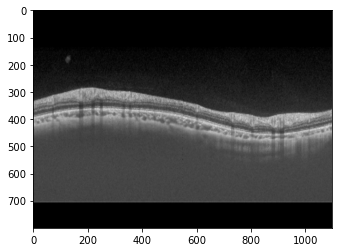

In [33]:
trainset_root = '../datasets/Train/Image/'
train_label_root = '../datasets/Train/Train_GC_GT.xlsx'
val_ratio = 0.2
image_size = 256
batchsize = 8 
iters = 10


filelists = os.listdir(trainset_root)
train_filelists, val_filelists = train_test_split(filelists, test_size = val_ratio, random_state=42) # random_state值不变，每次运行此函数生成的两个列表完全相同，random_state=False每次生成的列表不同
print(val_filelists)

    # print(img_index)
# print(val_filelists[0][0])
# for index, row in pd.read_excel(train_label_root).iterrows():
#     print(row)

label = {row['ImgName']:row['GC_Label'] for _, row in pd.read_excel(train_label_root).iterrows()} # label是一个图片对应label的字典
for i in filelists:
    img_index = int(i.split('.')[0])
    # print(label[img_index])
print(label)
img = cv2.imread(os.path.join(trainset_root, filelists[1]))
# img = img.transpose(2, 0).transpose(1,2) # H, W, C -> C, H, W
print(img.shape)
print(img.dtype)
plt.figure()
plt.imshow(img)


In [55]:
# 输入：dataset_root为图片路径，filelists为存储图片文件名的列表，label_file为存储label的文件
# 输出：若mode=='tain' or 'val'输出imgs和labels，若mode=='test'输出imgs(test模式下图片没有标签)
class GOALS_sub2_dataset(Dataset):
    def __init__(self, img_transforms, dataset_root, filelists=None, label_file=None, mode='train'): 
        self.img_transforms = img_transforms
        self.dataset_root = dataset_root
        self.filelists = filelists
        self.label_file = label_file
        self.mode = mode

    def __getitem__(self, idx):
        label_dict = {row['ImgName']:row['GC_Label'] for _, row in pd.read_excel(self.label_file).iterrows()} # label是一个图片对应label的字典
        
        if self.mode == 'train' or self.mode == 'val':
            img_index = int(self.filelists[idx].split('.')[0])
            label = label_dict[img_index]
            img = cv2.imread(os.path.join(self.dataset_root, self.filelists[idx]))
            # img = torch.from_numpy(img)/255
            img = img/255
        if self.mode == 'test':
            img = cv2.imread(os.path.join(self.dataset_root, filelists[idx]))
            # img = torch.from_numpy(img)/255
            img = img/255

        if self.img_transforms is not None:
            img = self.img_transforms(img)

        if self.mode == 'train' or self.mode == 'val':
            return img, label
        if self.mode == 'test':
            return img
    
    def __len__(self):
        return len(self.filelists)


img_train_transforms = trans.Compose([
    trans.ToTensor(),
    # trans.CenterCrop(image_size),
    trans.Resize((image_size, image_size))
])

train_dataset = GOALS_sub2_dataset(img_transforms=img_train_transforms, 
                                    dataset_root=trainset_root, 
                                    filelists=val_filelists, 
                                    label_file=train_label_root, 
                                    mode='train')

train_loader = DataLoader(dataset=train_dataset, 
                            batch_size=batchsize,
                            num_workers=0,
                            shuffle=True,
                            drop_last=True)

# img, label, img_index, label_dict = train_dataset.__getitem__(idx = 3)
# print(label.dtype)
# print(img.shape)
# print(img_index)
# print(label_dict)


iter = 0
while iter < iters:
    for _, data in enumerate(train_loader):
        iter+=1
        img, label = data
        # print(np.array(label).shape)
        print(img)
        print(label)



tensor([[[[0.1106, 0.0871, 0.0807,  ..., 0.0942, 0.0608, 0.0770],
          [0.1020, 0.0902, 0.0932,  ..., 0.0942, 0.0984, 0.0856],
          [0.1047, 0.0824, 0.0913,  ..., 0.0853, 0.0850, 0.0992],
          ...,
          [0.2017, 0.2247, 0.1957,  ..., 0.2027, 0.2037, 0.2315],
          [0.2027, 0.1801, 0.1842,  ..., 0.1904, 0.2343, 0.2347],
          [0.0038, 0.0035, 0.0034,  ..., 0.0035, 0.0044, 0.0044]],

         [[0.1106, 0.0871, 0.0807,  ..., 0.0942, 0.0608, 0.0770],
          [0.1020, 0.0902, 0.0932,  ..., 0.0942, 0.0984, 0.0856],
          [0.1047, 0.0824, 0.0913,  ..., 0.0853, 0.0850, 0.0992],
          ...,
          [0.2017, 0.2247, 0.1957,  ..., 0.2027, 0.2037, 0.2315],
          [0.2027, 0.1801, 0.1842,  ..., 0.1904, 0.2343, 0.2347],
          [0.0038, 0.0035, 0.0034,  ..., 0.0035, 0.0044, 0.0044]],

         [[0.1106, 0.0871, 0.0807,  ..., 0.0942, 0.0608, 0.0770],
          [0.1020, 0.0902, 0.0932,  ..., 0.0942, 0.0984, 0.0856],
          [0.1047, 0.0824, 0.0913,  ..., 0

In [5]:
test_root = '../datasets/Validation/Image'
filelists = os.listdir(test_root)
print(filelists)
for img in filelists:
    index = int(img.split('.')[0])
    print(index)

['0181.png', '0199.png', '0169.png', '0156.png', '0101.png', '0160.png', '0193.png', '0110.png', '0124.png', '0166.png', '0189.png', '0117.png', '0177.png', '0126.png', '0182.png', '0186.png', '0198.png', '0146.png', '0174.png', '0140.png', '0144.png', '0183.png', '0176.png', '0121.png', '0178.png', '0195.png', '0159.png', '0139.png', '0116.png', '0142.png', '0194.png', '0154.png', '0151.png', '0112.png', '0188.png', '0134.png', '0152.png', '0106.png', '0165.png', '0137.png', '0164.png', '0153.png', '0129.png', '0119.png', '0184.png', '0105.png', '0167.png', '0123.png', '0170.png', '0148.png', '0118.png', '0150.png', '0109.png', '0108.png', '0125.png', '0171.png', '0136.png', '0173.png', '0104.png', '0120.png', '0113.png', '0187.png', '0128.png', '0103.png', '0168.png', '0127.png', '0172.png', '0130.png', '0161.png', '0175.png', '0192.png', '0158.png', '0200.png', '0107.png', '0114.png', '0138.png', '0115.png', '0145.png', '0149.png', '0157.png', '0190.png', '0197.png', '0180.png', '01